# Empirical exploration of support vectors classifiers

The egg-yoke dataset is not linearly separable. In order to make it linearly separable several data transformations $\phi$ can be performed:
- polar coordinates $\phi(x_1, x_2)= (\rho, \theta)$
- add a dimension: $\phi(x_1, x_2) = (x_1, x_2, x_1^2+x_2^2)$
- change a dimension: $\phi(x_1, x_2) = (x_1, x_1^2+x_2^2)$

You will have two (or more) versions of this dataset: with and without transformation.

### Questions:
1. Apply sklearn SVC classifier with a linear kernel to the transformed version of the dataset and an (rbf or poly) kernel to the original version of the data. Compare results.
2. Identify the attributes of SVC class that would allow you to reconstruct the decision functions: $y(\mathbf{x}) = \sum_{i=1}^m a_i t_i k(\mathbf{x}, \mathbf{x}_i) + w_0$
3. Plot the decision functions you reconstructed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel

In [3]:
# Get train data
train_data = pd.read_csv("eggyoke_traindata.csv")
X_train = train_data[["x_1", "x_2"]]
y_train = train_data[["y"]]

In [4]:
# Get test data
test_data = pd.read_csv("eggyoke_testdata.csv")
X_test = test_data[["x_1", "x_2"]]
y_test = test_data[["y"]]

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Let's take another look at how the dataset points are distributed across two classes. As we can see, in the original space the classes are **not linearly separable**.
</div>

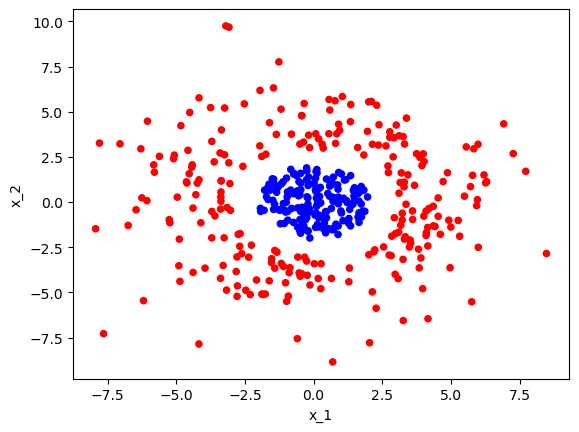

In [5]:
X_concat = pd.concat((X_test, X_train)).reset_index(drop=True)
y_concat = pd.concat((y_test, y_train)).reset_index(drop=True)
col = {-1: "r", 1: "b"}
X_concat.plot.scatter(x='x_1', y='x_2', c=[col[e] for e in y_concat["y"]])
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
First, we convert `X_train`, `X_test`, `y_train`, and `y_test` into `np.ndarray`, since sklearn’s SVC expects this data type as input.
</div>

In [6]:
X_train_arr = X_train.values
X_test_arr  = X_test.values
y_train_arr = np.ravel(y_train)
y_test_arr  = np.ravel(y_test)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Now let's define two possible data transformations $\phi$.
</div>

In [7]:
def phi_change(X):
    """φ(x1, x2) = (x1, x1^2 + x2^2)"""
    X = np.asarray(X)
    return np.column_stack([X[:, 0], X[:, 0]**2 + X[:, 1]**2])

def phi_polar(X):
    """φ(x1, x2) = (rho, theta)"""
    X = np.asarray(X)
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    rho = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)  # angle in radians
    
    return np.column_stack([rho, theta])

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Define the $\phi$ transformation that will be used in this notebook to transform the data in order to compare the results of applying an SVC with a linear kernel on the transformed data with the results of applying an SVC with a nonlinear kernel on the original data.

**Change $\phi$ to see the results for other possible transformations.**
</div>

In [8]:
phi, phi_description = phi_change, "φ=(x1, x1^2+x2^2)"
# phi, phi_description = phi_polar, "φ=(rho, theta)"

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Transform training / test sets for the linear SVC.
</div>

In [9]:
X_train_phi = phi(X_train_arr)
X_test_phi  = phi(X_test_arr)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Train linear SVC on transformed data.
</div>

In [10]:
clf_lin = SVC(kernel='linear')
clf_lin.fit(X_train_phi, y_train_arr)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Train RBF kernel SVC on original data.
</div>

In [11]:
clf_rbf = SVC(kernel='rbf', gamma='scale')
clf_rbf.fit(X_train_arr, y_train_arr)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Train polynomial kernel (degree 2) SVC on original data.
</div>

In [12]:
clf_poly = SVC(kernel='poly', degree=2, gamma='scale', coef0=1.0)
clf_poly.fit(X_train_arr, y_train_arr)

,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,1.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Let's evaluate test accuracies for all trained models.
</div>

In [13]:
print("Test accuracies:")
print("- Linear SVC on phi-transformed data:  {:.3f}".format(
    accuracy_score(y_test_arr, clf_lin.predict(X_test_phi))))
print("- RBF SVC on original data:            {:.3f}".format(
    accuracy_score(y_test_arr, clf_rbf.predict(X_test_arr))))
print("- Poly(degree=2) SVC on original data: {:.3f}".format(
    accuracy_score(y_test_arr, clf_poly.predict(X_test_arr))))

Test accuracies:
- Linear SVC on phi-transformed data:  1.000
- RBF SVC on original data:            1.000
- Poly(degree=2) SVC on original data: 1.000


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
All test accuracies are equal to 1. This means that in all three cases the data, in the given feature space + the kernel, became **linearly separable**.
</div>

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Let's take a look at the attributes of SVC class that would allow us to reconstruct the decision function $y(\mathbf{x}) = \sum_{i=1}^m a_i t_i k(\mathbf{x}, \mathbf{x}_i) + w_0$.
</div>

In [14]:
print("Attributes for reconstruction of linear SVC classifier trained on the transformed features:")
print("clf_lin.coef_.shape (weights in primal):", getattr(clf_lin, "coef_", None).shape)
print("clf_lin.intercept_.shape:               ", clf_lin.intercept_.shape)

Attributes for reconstruction of linear SVC classifier trained on the transformed features:
clf_lin.coef_.shape (weights in primal): (1, 2)
clf_lin.intercept_.shape:                (1,)


In [15]:
print("Attributes for reconstruction of RBF SVC classifier trained on the original data:")
print("clf_rbf.support_vectors_.shape:", clf_rbf.support_vectors_.shape)
print("clf_rbf.dual_coef_.shape:      ", clf_rbf.dual_coef_.shape)
print("clf_rbf.intercept_.shape:      ", clf_rbf.intercept_.shape)

Attributes for reconstruction of RBF SVC classifier trained on the original data:
clf_rbf.support_vectors_.shape: (36, 2)
clf_rbf.dual_coef_.shape:       (1, 36)
clf_rbf.intercept_.shape:       (1,)


In [16]:
print("Attributes for reconstruction of Poly(degree=2) SVC classifier trained on the original data:")
print("clf_poly.support_vectors_.shape:", clf_poly.support_vectors_.shape)
print("clf_poly.dual_coef_.shape:      ", clf_poly.dual_coef_.shape)
print("clf_poly.intercept_.shape:      ", clf_poly.intercept_.shape)

Attributes for reconstruction of Poly(degree=2) SVC classifier trained on the original data:
clf_poly.support_vectors_.shape: (38, 2)
clf_poly.dual_coef_.shape:       (1, 38)
clf_poly.intercept_.shape:       (1,)


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Since we are using `gamma='scale'` in RBF and Poly SVC models, we can create `get_gamma` function that will return `gamma` according to sklearn documentation:

$\gamma =$ 1 / n_features * X.var().
</div>

In [17]:
def get_gamma(X):
    X = np.asarray(X)
    var = X.var() if X.size else 1.0
    return 1.0 / (X.shape[1] * var)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Create grid in original input space for plotting.
</div>

In [18]:
# create grid in original input space for plotting
x_min, x_max = X_train_arr[:,0].min() - 0.5, X_train_arr[:,0].max() + 0.5
y_min, y_max = X_train_arr[:,1].min() - 0.5, X_train_arr[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.column_stack([xx.ravel(), yy.ravel()])

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Reconstruct the linear SVC classifier trained on the transformed features and compute the values of the decision function on the grid points.
</div>

In [20]:
w = clf_lin.coef_.ravel()  # length 2 for phi_change and phi_polar
b = clf_lin.intercept_[0]
xt = phi(grid)
# decision g(x) = w0 * xt0 + w1 * xt1 (+ w2 * xt2 ...) + b
g_lin_grid = b
for i in range(xt.shape[1]):
    g_lin_grid += w[i] * xt[:, i]
g_lin_grid = g_lin_grid.reshape(xx.shape)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Reconstruct the RBF SVC classifier trained on the original data and compute the values of the decision function on the grid points.
</div>

In [21]:
gamma_rbf = get_gamma(X_train_arr)
SV_rbf = clf_rbf.support_vectors_
dual_rbf = clf_rbf.dual_coef_.ravel()  # a_i * t_i
inter_rbf = clf_rbf.intercept_[0]
K_grid_sv = rbf_kernel(grid, SV_rbf, gamma=gamma_rbf)  # shape (n_grid, n_sv)
g_rbf_grid_recon_ = (K_grid_sv @ dual_rbf) + inter_rbf
g_rbf_grid_recon = g_rbf_grid_recon_.reshape(xx.shape)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Now we verify that the reconstructed decision function matches the decision function of the sklearn model.
</div>

In [22]:
dd_direct_rbf = clf_rbf.decision_function(grid)
print("Max abs diff of RBF reconstruction vs .decision_function():", np.max(np.abs(dd_direct_rbf - g_rbf_grid_recon_)))

Max abs diff of RBF reconstruction vs .decision_function(): 5.329070518200751e-15


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Reconstruct the Poly(degree=2) SVC classifier trained on the original data and compute the values of the decision function on the grid points.
</div>

In [23]:
gamma_poly = get_gamma(X_train_arr)
SV_poly = clf_poly.support_vectors_
dual_poly = clf_poly.dual_coef_.ravel()
inter_poly = clf_poly.intercept_[0]
K_grid_sv_poly = polynomial_kernel(grid, SV_poly, degree=clf_poly.degree, gamma=gamma_poly, coef0=clf_poly.coef0)
g_poly_grid_recon_ = (K_grid_sv_poly @ dual_poly) + inter_poly
g_poly_grid_recon = g_poly_grid_recon_.reshape(xx.shape)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Now we verify that the reconstructed decision function matches the decision function of the sklearn model.
</div>

In [24]:
dd_direct_poly = clf_poly.decision_function(grid)
print("Max abs diff of Poly reconstruction vs .decision_function():", np.max(np.abs(dd_direct_poly - g_poly_grid_recon_)))

Max abs diff of Poly reconstruction vs .decision_function(): 7.105427357601002e-14


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
Finally, we visualize the decision function for the three models trained above, comparing the linear SVC on the transformed features with the RBF and polynomial SVCs built from the original data. Specifically, we plot contour lines of the decision function values on the grid (xx, yy) for levels -1, 0, and 1 (class boundaries and the separating line), with the data points overlaid on these regions to visually assess the classification quality.
</div>

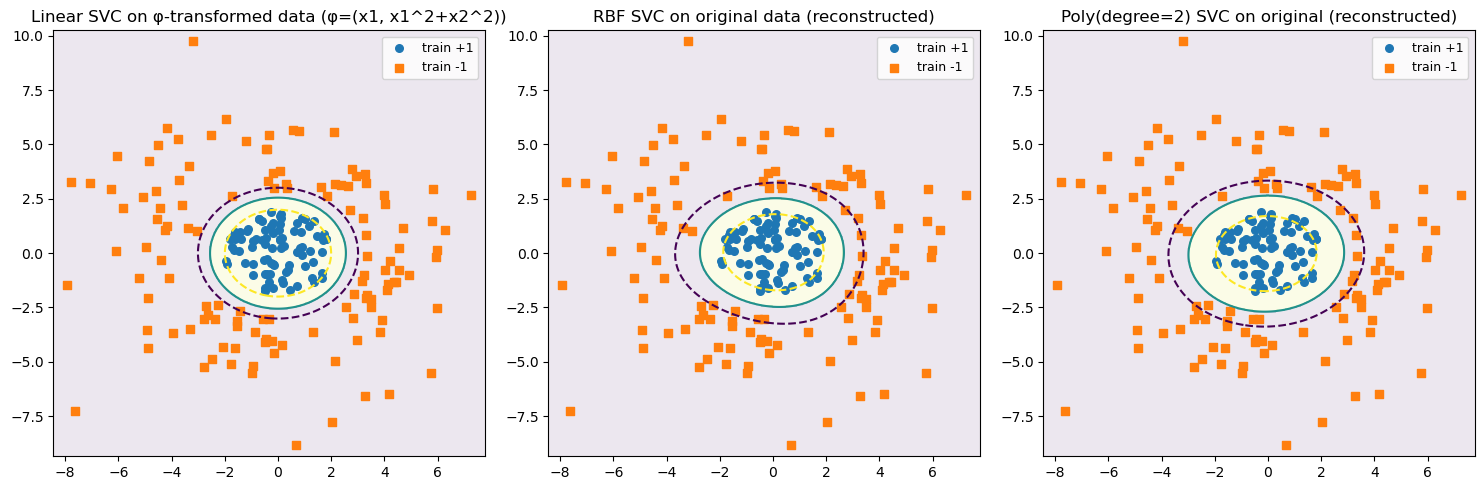

In [25]:
plt.figure(figsize=(15, 5))

# helper to plot points
def plot_data_points(ax):
    # plot training points
    # use y_train_arr values for color
    ax.scatter(X_train_arr[y_train_arr==1,0], X_train_arr[y_train_arr==1,1], marker='o', s=30, label='train +1')
    ax.scatter(X_train_arr[y_train_arr==-1,0], X_train_arr[y_train_arr==-1,1], marker='s', s=30, label='train -1')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.legend(loc='upper right', fontsize=9)

# linear on phi-transformed data
ax = plt.subplot(1, 3, 1)
cs = ax.contour(xx, yy, g_lin_grid, levels=[-1.0, 0.0, 1.0], linestyles=['--','-','--'])
ax.contourf(xx, yy, np.sign(g_lin_grid), alpha=0.1)   # background region
plot_data_points(ax)
ax.set_title(f"Linear SVC on φ-transformed data ({phi_description})")

# rbf on original data
ax = plt.subplot(1,3,2)
cs = ax.contour(xx, yy, g_rbf_grid_recon, levels=[-1.0, 0.0, 1.0], linestyles=['--','-','--'])
ax.contourf(xx, yy, np.sign(g_rbf_grid_recon), alpha=0.1)
plot_data_points(ax)
ax.set_title("RBF SVC on original data (reconstructed)")

# poly degree 2 on original data
ax = plt.subplot(1,3,3)
cs = ax.contour(xx, yy, g_poly_grid_recon, levels=[-1.0, 0.0, 1.0], linestyles=['--','-','--'])
ax.contourf(xx, yy, np.sign(g_poly_grid_recon), alpha=0.1)
plot_data_points(ax)
ax.set_title("Poly(degree=2) SVC on original (reconstructed)")

plt.tight_layout()
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
**Overall conclusion.**
- All three approaches succeed in separating the classes.
- A properly chosen feature transformation or kernel can turn a nonlinearly separable problem into a linearly separable one.
- The $\phi$-transformation, RBF kernel, and polynomial kernel (degree 2) are all effective in this specific circular-like dataset, with only minor differences in the exact shape of the decision boundary.
</div>